#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#### Load the Dataset

In [3]:
df = pd.read_csv("pokemon.csv")  # Change path if needed
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Data Cleaning

In [4]:
df.drop(columns=['#'], inplace=True)  # Drop ID column
df.dropna(inplace=True)  # Drop missing values if any

#### Data Preprocessing

In [5]:
df['Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)
df['Legendary'] = df['Legendary'].astype(int)  # Convert Boolean to int for modeling

#### Basic Statistics

In [6]:
print(df.describe())
print(df['Type 1'].value_counts())

            Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  414.000000  414.000000  414.000000  414.000000  414.000000  414.000000   
mean   456.628019   70.649758   83.173913   79.676329   77.048309   75.565217   
std    120.849502   22.896557   33.698473   32.593788   33.805061   27.949961   
min    190.000000    1.000000   10.000000   15.000000   10.000000   20.000000   
25%    355.000000   55.000000   59.250000   55.000000   50.000000   55.000000   
50%    475.000000   70.000000   80.000000   75.500000   70.000000   75.000000   
75%    529.500000   85.000000  103.000000  100.000000  100.000000   94.750000   
max    780.000000  150.000000  190.000000  230.000000  180.000000  230.000000   

            Speed  Generation   Legendary  
count  414.000000  414.000000  414.000000  
mean    70.514493    3.410628    0.096618  
std     28.521408    1.663010    0.295795  
min      5.000000    1.000000    0.000000  
25%     50.000000    2.000000    0.000000  
50%   

#### Visualizations

In [7]:
sns.set(style="whitegrid")

#### Count of Pokémon by Type

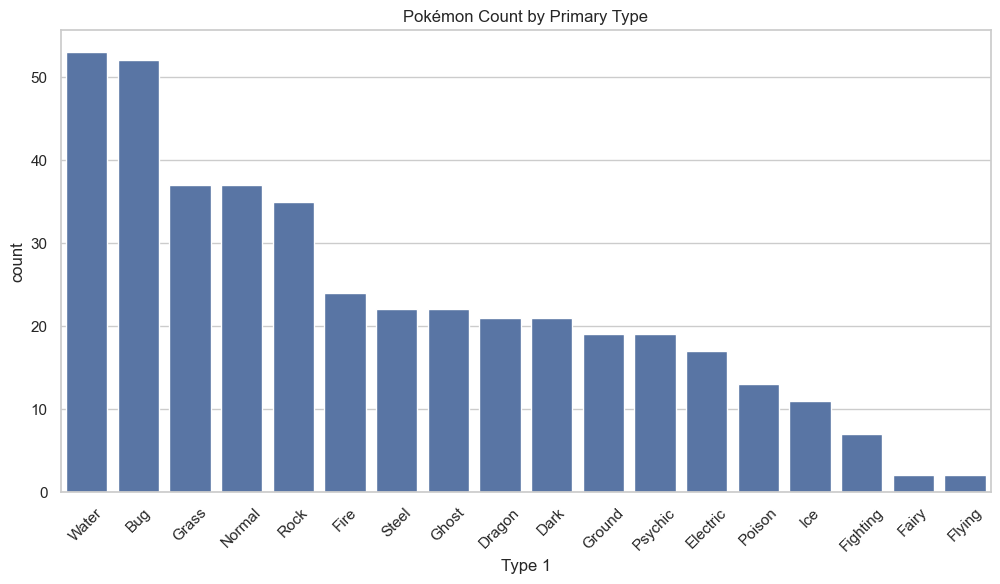

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Type 1', order=df['Type 1'].value_counts().index)
plt.title('Pokémon Count by Primary Type')
plt.xticks(rotation=45)
plt.show()

#### Correlation Heatmap

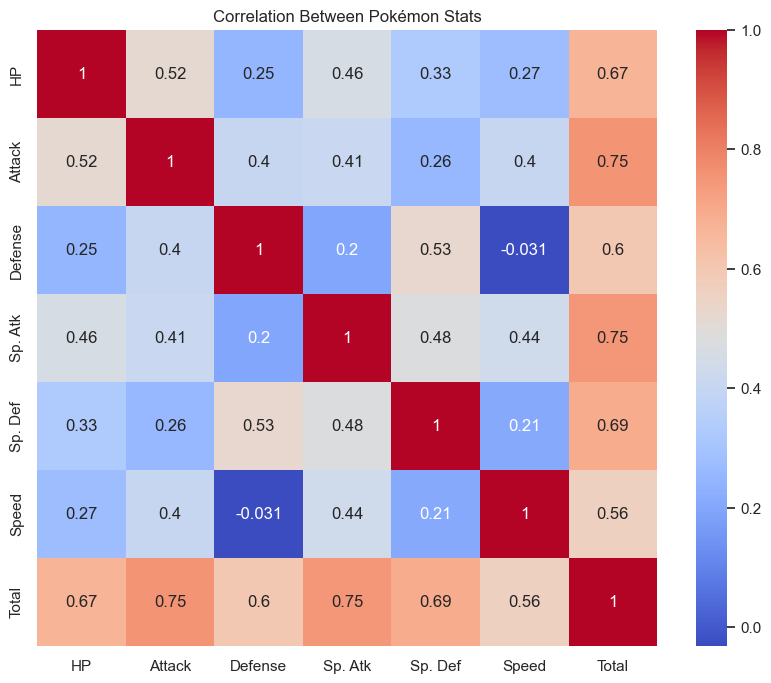

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Pokémon Stats')
plt.show()

#### Attack vs Defense

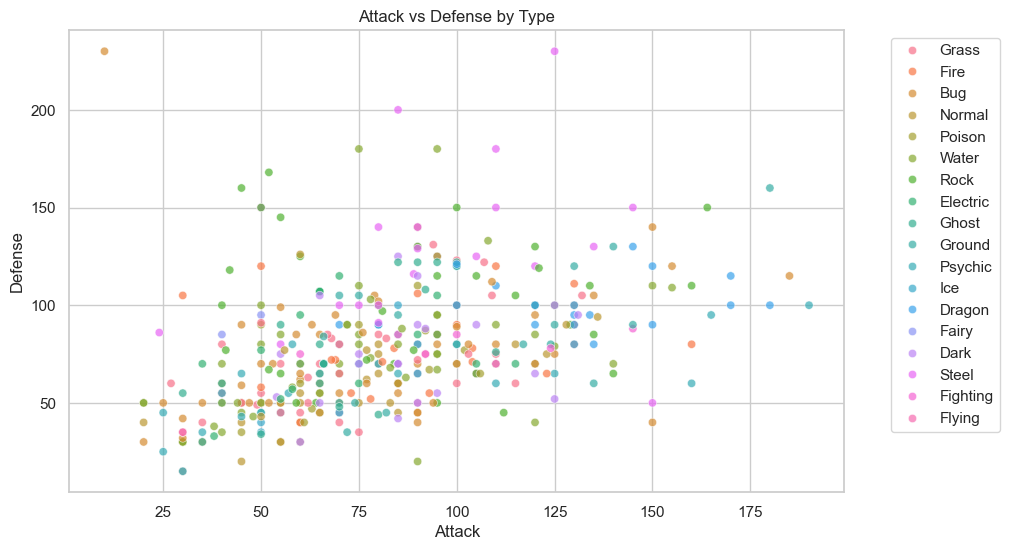

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Type 1', alpha=0.7)
plt.title('Attack vs Defense by Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Boxplot for HP by Type

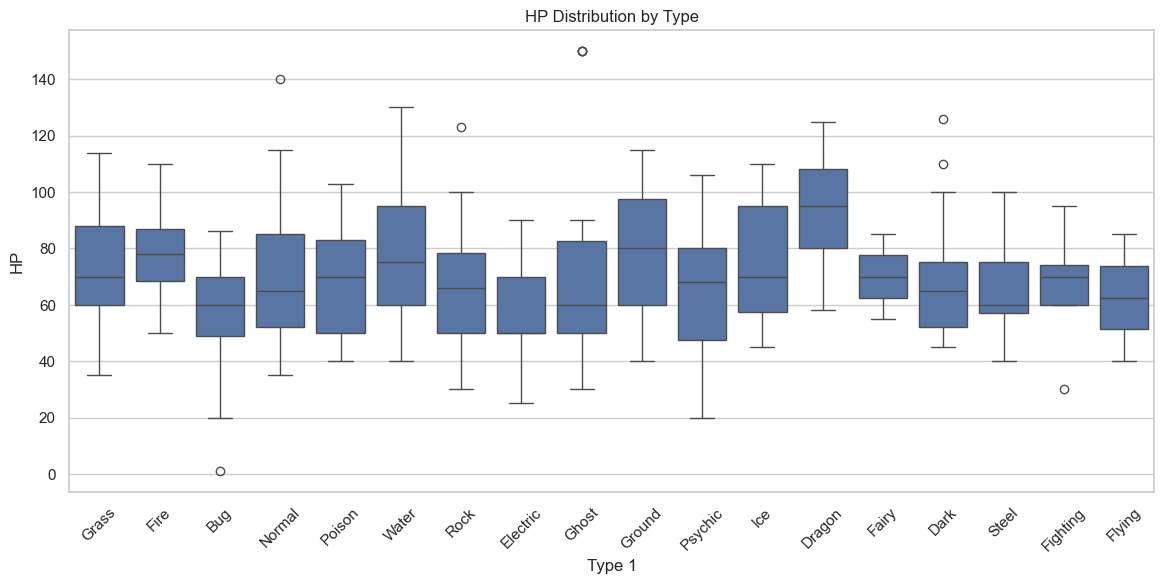

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Type 1', y='HP')
plt.title('HP Distribution by Type')
plt.xticks(rotation=45)
plt.show()

#### Machine Learning - Predict Legendary Pokémon

In [12]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
X = df[features]
y = df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.927710843373494
Confusion Matrix:
 [[73  1]
 [ 5  4]]
